<a href="https://colab.research.google.com/github/siming-deng/micro_cred_winter_2022/blob/main/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [9]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
# new data frame with only sex and salary columns
new_df = df[['sex','salary']].copy()

In [11]:
# print out the new data frame
new_df

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [12]:
# create a filter mask based on the condition
filter = new_df['sex'] == 'Male'

In [13]:
# a new data frame with the condition applied
male = new_df[filter]
male

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


In [14]:
# median salary for all males
male['salary'].median()

108043.0

Finding the Median salary for all females

In [15]:
# create a filter mask for females condition
filter_mask = new_df['sex'] == 'Female'

In [16]:
# display the data frame with the new condition
female = new_df[filter_mask]
female

,sex,salary
9,Female,129000
19,Female,137000
24,Female,74830
34,Female,80225
35,Female,77000
47,Female,151768
48,Female,140096
52,Female,74692
63,Female,103613
68,Female,111512


In [17]:
# print out median salary for all females
female['salary'].median()

103750.0

In [18]:
# calculate the difference between males and females median salary
difference_median = round(male['salary'].median() - female['salary'].median(), 2)
print('The difference between males and females median salary is:', difference_median)

The difference between males and females median salary is: 4293.0


Comparing the Mean salary of Males and Females

In [19]:
# mean salary of females
print(round(female['salary'].mean(),2))

101002.41


In [20]:
# mean salary of males
print(round(male['salary'].mean(),2))

115090.42


In [21]:
# The difference between mean salaries of male and female
difference = round(male['salary'].mean() - female['salary'].mean(), 2)
print(difference)

14088.01


In [22]:
# compare the mean salary between males and females
if male['salary'].mean() > female['salary'].mean():
  print('Mean salaries of male more than mean salaries of female by $', difference)
else:
  print('Mean salaries of female more than mean salaries of male by $', difference)

Mean salaries of male more than mean salaries of female by $ 14088.01


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [23]:
# specify the condition for 20 or more years of experience
experience = df['yrs.service'] >= 20

In [24]:
# print out the data frame with the condition applied
experience_df = df[experience]
experience_df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
...,...,...,...,...,...,...,...
384,385,Prof,A,27,21,Male,125192
386,387,Prof,A,29,27,Male,139219
388,389,Prof,A,38,36,Male,119450
392,393,Prof,A,33,30,Male,103106


In [25]:
# print the mean salary for people who have 20 or more years of experience
mean = experience_df['salary'].mean()
mean_currency = '${:,.2f}'.format(mean)
print('Mean salary for people with 20 or more years of experience is:', mean_currency)

Mean salary for people with 20 or more years of experience is: $122,520.66


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [26]:
# condition for people with less than 20 years of experience
less_experience = df['yrs.service'] < 20

In [27]:
# apply the condition to the data frame
less_experience_df = df[less_experience]
less_experience_df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
5,6,AssocProf,B,6,6,Male,97000
9,10,Prof,B,18,18,Female,129000
...,...,...,...,...,...,...,...
390,391,Prof,A,40,19,Male,166605
391,392,Prof,A,30,19,Male,151292
393,394,Prof,A,31,19,Male,150564
395,396,Prof,A,25,15,Male,95329


In [28]:
# get the mean salary for people with less than 20 years of experience
less_experience_mean = less_experience_df['salary'].mean()
less_experience_mean_currency = '${:,.2f}'.format(less_experience_mean)
print('Mean salary for people with less than 20 years of experience is', less_experience_mean_currency)

Mean salary for people with less than 20 years of experience is $107,940.50


In [29]:
# difference between mean salary for people less than 20 years experience and 
# mean salary for people with 20 or more years of experience
difference_mean = round(mean - less_experience_mean,2)
print('Mean salary difference between people who have 20+ years of experience and people who have less than 20 years of experience is $', difference_mean)

Mean salary difference between people who have 20+ years of experience and people who have less than 20 years of experience is $ 14580.15


In [30]:
# compare the mean salary between people who have 20+ years of experience and people
# with less than 20 years of experience
if mean > less_experience_mean:
  print('Mean salary for people who have 20+ years of experience is more than the mean salary for people who have less than 20 years of experience by $', difference_mean)
else:
  print('Mean salary for people who have less than 20 years of experience is more than the mean salary for people who have 20+ years of experience by $', difference_mean)


Mean salary for people who have 20+ years of experience is more than the mean salary for people who have less than 20 years of experience by $ 14580.15


People who have salary of greater than or equal to 200,000

In [31]:
# display people who have salary greater than or equal to $ 200,000
salary = df['salary'] >= 200000
salary_df = df[salary]
salary_df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


The result shows three professors who have salary greater than or equal to $200,000 in this data set. It seems like professors who got their phd earlier are more likely to get higher salary, but more sample are needed to draw any further conclusion.


# Rename values, subset columns, etc

In [32]:
# delete one unnecessary column
del df['Unnamed: 0']

In [33]:
# rename some of the column names
final_df = df.rename(columns = {'yrs.service':'yrs_experience', 'rank':'role', 'yrs.since.phd':'yrs_since_phd'})

In [34]:
# print out the final data frame
final_df

,role,discipline,yrs_since_phd,yrs_experience,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

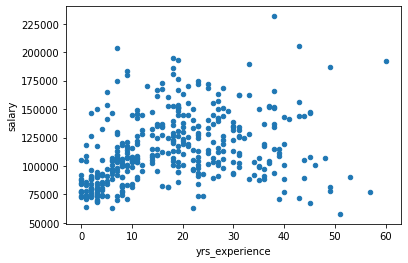

In [35]:
# scatter plot to display relationship between years of experience and salary
final_df.plot(x = 'yrs_experience', y = 'salary', kind = 'scatter')

In [36]:
# correlation of the above scatter plot
final_df['yrs_experience'].corr(final_df['salary'])

0.3347446756998623

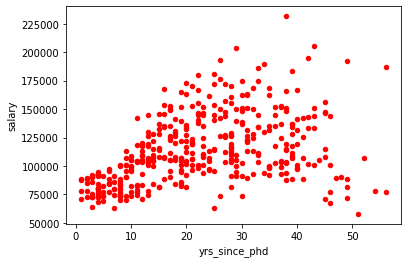

In [37]:
# scatter plot to display relationship between salary and years since phd
final_df.plot(x = 'yrs_since_phd', y = 'salary', kind = 'scatter', color = 'red')

In [38]:
# correlation of the above scatter plot
final_df['yrs_since_phd'].corr(final_df['salary'])

0.41923110680257986

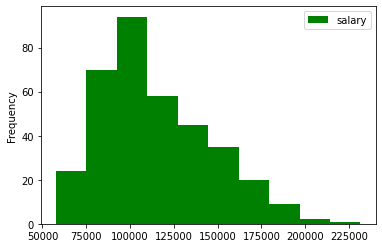

In [39]:
# histogram showing salary for males
male.plot(kind = 'hist', color = 'green')

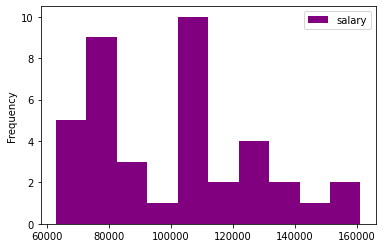

In [40]:
# histogram showing salary for females
female.plot(kind = 'hist', color = 'purple')

The first scatter plot shows a weak positive linear relationship between two variables—years of experience and salary—with a correlation of 0.33. This indicates that while both years of experience and salary go up in response to one another, the relationship is not very strong. On the other hand, the second scatter plot shows a moderately strong positive linear relationship between salary and years since getting the Ph.D., with a correlation coefficient of 0.42. This indicates a relatively strong positive correlation between salary and years since getting the Ph.D. If both years of experience and years since getting the Ph.D. are factors to influence the amount of salary, then years since getting the Ph.D. might be a stronger relationship.

The first histogram has a discrete distribution and it shows males’ salaries. Most of the males get around $100,000 salary. 

The second histogram has a binomial distribution and it shows females’ salaries. Most of the females get around $80,000 or $100,500.

This shows that for most of the entry-level roles, females are getting less salary than males. In addition, most of the females and males have salaries at around $100,000 - $110,000 dollars. 


# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

The dataset contains salary information for professors, with a total of 397 samples. Of all the professors:

1. The average years since Ph.D. is 22 years with a standard deviation of 12.88.
2. the average years of experience are about 18 years with a standard deviation of 13, and the average salary is $113,706 with a standard deviation of 30,289.

From these statistics, it’s worth noting that salary has a high standard deviation, which means that the amount of salary is more spread out. 

3. The minimum years since Ph.D. is 1, the median is 21 years, and the maximum years since Ph.D. is 56.
4. The minimum year of experience is 0, the median is 16 years, and the maximum years of experience is 60.
5. The minimum salary among the dataset is $57,800, the median is $107,300 dollars, and the maximum salary is $231,545.

It’s always a good idea to take a look at the data based on the gender differences, in this case, the dataset will be separated into two, one for females and one for males. 

6. The median salary for males is $108,043.

1. The median salary for females is $103,750.

It’s clear that females’ median salary is less than males’ median salary by $4293. 

When considering the average salary, females’ mean salary is $101,002.41.

Males’ mean salary is $115,090.42. 

Thus the Mean salaries of males are more than the mean salaries of females by $ 14088.01. In general, females’ salaries are less than males’ salaries, there is a salary gender gap in this profession.

I also discovered that when diving into data of years of experience and comparing the salaries of people who have 20+ years of experience vs less than 20 years experience, it was found that the ​​mean salary for people with 20 or more years of experience is $122,520.66. 

The mean salary for people with less than 20 years of experience is $107,940.50. 

Thus, people with 20+ years of experience have more salary than people with less than 20 years of experience by $14,580.15. 
